<a href="https://colab.research.google.com/github/phong516/AI_Course/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=6b51452a52fec98ef588811e78b015830bc5718e25cd22b67b30407435d1952a
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

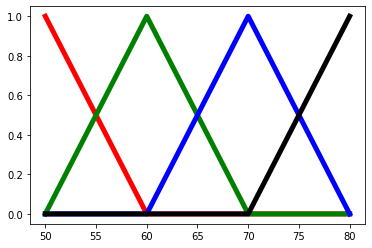

In [ ]:
x = np.arange(50, 81, 1)
plt.figure()

slow = fuzz.trimf(x, [50, 50, 60])
plt.plot(x, slow, 'r', linewidth = 5, label = 'Slow')

medium = fuzz.trimf(x, [50, 60, 70])
plt.plot(x, medium, 'g', linewidth = 5, label = 'Medium')

mediumFast = fuzz.trimf(x, [60, 70, 80])
plt.plot(x, mediumFast, 'b', linewidth = 5, label = 'Medium Fast')

fullSpeed = fuzz.trimf(x, [70, 80, 80])
plt.plot(x, fullSpeed, 'k', linewidth = 5, label = 'Full Speed')

plt.plot

////////////////////////////////////////////////////////////////////////////////

In [ ]:
from skfuzzy import control as ctrl


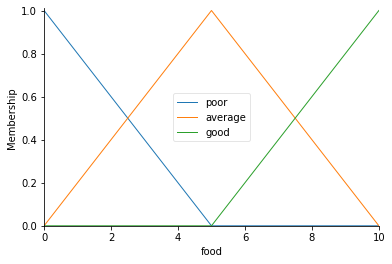

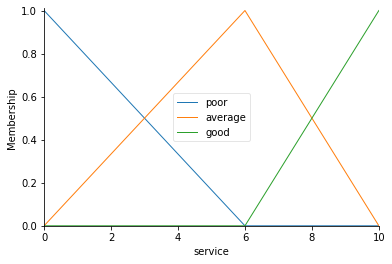

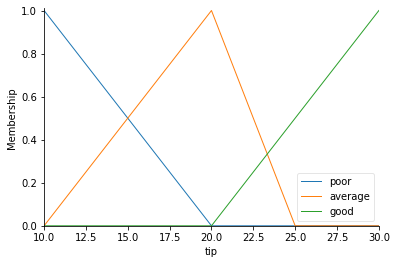

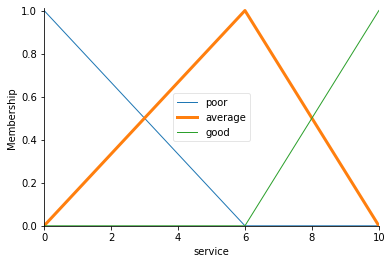

In [ ]:
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(10, 31, 1), 'tip')

food.automf(3)
service.automf(3)

food['poor'] = fuzz.trimf(food.universe, [0, 0, 5])
food['average'] = fuzz.trimf(food.universe, [0, 5, 10])
food['good'] = fuzz.trimf(food.universe, [5, 10, 10])

service['poor'] = fuzz.trimf(service.universe, [0, 0, 6])
service['average'] = fuzz.trimf(service.universe, [0, 6, 10])
service['good'] = fuzz.trimf(service.universe, [6, 10, 10])

tip['poor'] = fuzz.trimf(tip.universe, [10, 10, 20])
tip['average'] = fuzz.trimf(tip.universe, [10, 20, 25])
tip['good'] = fuzz.trimf(tip.universe, [20, 30, 30])

food.view()
service.view()
tip.view()
service['average'].view()


In [ ]:
######----RULE----###########

rule1 = ctrl.Rule(service['poor'], tip['poor'])
rule2 = ctrl.Rule(food['poor'] & (service['average'] | service['good']), tip['average'])
rule3 = ctrl.Rule(food['average'] & service['average'], tip['average'])
rule4 = ctrl.Rule(food['average'] & service['good'], tip['good'])
rule5 = ctrl.Rule(food['good'] & (service['average'] | service['good']), tip['good'])

22.403440548042894


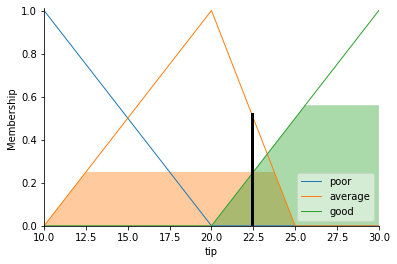

In [ ]:
#----RULE APPLY----#

tippingCtrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
tipping = ctrl.ControlSystemSimulation(tippingCtrl)
tipping.input['food'] = 7.8
tipping.input['service'] = 9
tipping.compute()
print(tipping.output['tip'])
tip.view(sim = tipping)


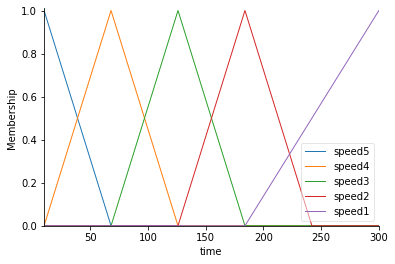

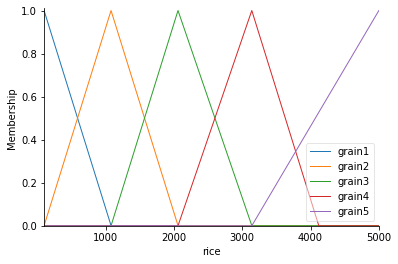

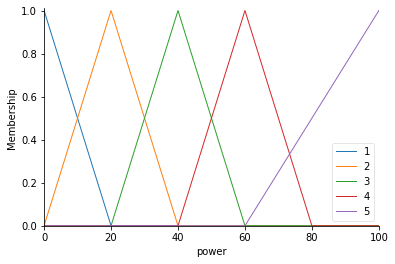

In [49]:
#----Rice Cooker----#
time = ctrl.Antecedent(np.arange(10, 301, 1), 'time')
rice = ctrl.Antecedent(np.arange(100, 5001, 1), 'rice')
power = ctrl.Consequent(np.arange(0, 101, 1), 'power')

#time.automf(5)
#rice.automf(5)

time['speed5'] = fuzz.trimf(time.universe, [10, 10, 68])
time['speed4'] = fuzz.trimf(time.universe, [10, 68, 126])
time['speed3'] = fuzz.trimf(time.universe, [68, 126, 184])
time['speed2'] = fuzz.trimf(time.universe, [126, 184, 242])
time['speed1'] = fuzz.trimf(time.universe, [184, 300, 300])


rice['grain1'] = fuzz.trimf(rice.universe, [100, 100, 1080])
rice['grain2'] = fuzz.trimf(rice.universe, [100, 1080, 2060])
rice['grain3'] = fuzz.trimf(rice.universe, [1080, 2060, 3140])
rice['grain4'] = fuzz.trimf(rice.universe, [2060, 3140, 4120])
rice['grain5'] = fuzz.trimf(rice.universe, [3140, 5000, 5000])


power['1'] = fuzz.trimf(power.universe, [0, 0, 20])
power['2'] = fuzz.trimf(power.universe, [0, 20, 40])
power['3'] = fuzz.trimf(power.universe, [20, 40, 60])
power['4'] = fuzz.trimf(power.universe, [40, 60, 80])
power['5'] = fuzz.trimf(power.universe, [60, 100, 100])


time.view()
rice.view()
power.view()


In [50]:
######----RULE----###########
rule = []
r1 = ctrl.Rule(time['speed1'] & rice['grain1'], power['1'])
rule.append(r1)

r2 = ctrl.Rule((time['speed1'] | time['speed2']) & (rice['grain5'] |rice['grain4'] | rice['grain3'] | rice['grain2'] | rice['grain1']), power['2'])
rule.append(r2)

r3 = ctrl.Rule((time['speed1'] | time['speed3'] | time['speed5']) & (rice['grain4'] |rice['grain3'] | rice['grain2'] | rice['grain1']), power['3'])
rule.append(r3)


r4 = ctrl.Rule((time['speed1'] | time['speed4'] | time['speed5']) & (rice['grain4'] |rice['grain3'] | rice['grain2'] | rice['grain1']), power['4'])
rule.append(r4)

r5 = ctrl.Rule((time['speed1'] | time['speed5']) & rice['grain1'], power['5'])
rule.append(r5)




62.34895461976944


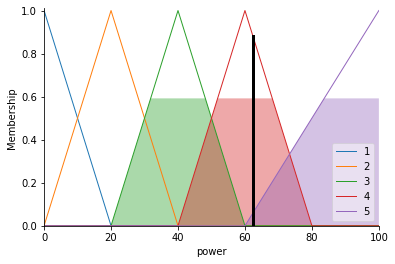

In [53]:
#----RULE APPLY----#

powerCtrl = ctrl.ControlSystem([r1, r2, r3, r4, r5])
powerOutput = ctrl.ControlSystemSimulation(powerCtrl)
powerOutput.input['rice'] = 500
powerOutput.input['time'] = 30
powerOutput.compute()
print(powerOutput.output['power'])
power.view(sim = powerOutput)
